In [1]:
import osmnx as ox
import networkx as nx
import json

In [2]:
#下载旧金山的OSM道路网络数据,并将其保存为shp和graphml两种格式：
#G = ox.graph_from_place(' San Francisco ',network_type='drive')
#ox.save_graph_shapefile(G)
#ox.save_graphml(G)

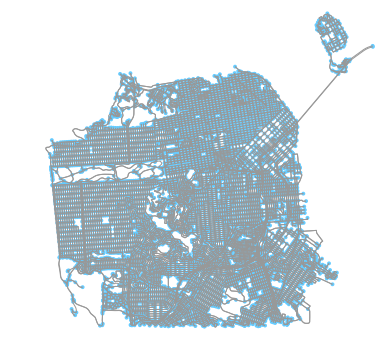

(<matplotlib.figure.Figure at 0x1bcc028fda0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1bcc0289b00>)

In [3]:
#利用Osmnx加载下载好的旧金山OSM道路网络数据，并绘图。
G = ox.load_graphml('graph.graphml')
ox.plot_graph(G)

In [4]:
#使用 Python 相关程序库的函数加载 San Francisco 数据集，并使用 Osmnx 程序库中查询某坐标点到某最近结点的函数，
#把数据集中的经纬度信息转换为道路结点信息，实现此最简单的地图匹配算法；并把得到的道路结点信息保存为文件。
#list1=list()
#with open("D:\\cabspottingdata\\cabspottingdata\\new_abboip.txt",'r') as  f:
#    for line in f:
#        co = line.split()
#        list1.append(ox.get_nearest_node(G,(float(co[0]),float(co[1]))))
#    json1=json.dump(list1,open('jsondocument','w'))

In [5]:
# 获取某一个坐标点最近的结点，并且输出它的结点ID
g = ox.get_nearest_node(G,(37.75134,-122.39488))
print(g)

1130284621


In [6]:
#将原始获得的旧金山的OSM道路网络数据投影并且保存到本地
#G_pro = ox.project_graph(G)
#ox.save_graphml(G_pro,filename='pro_graph.graphml')

{'highway': 'nan', 'osmid': 65293642, 'ref': 'nan', 'x': 550168.7438091787, 'y': 4179290.267335502, 'lon': '-122.4304416', 'lat': '37.7595539'}
{'highway': 'traffic_signals', 'osmid': 65352429, 'ref': 'nan', 'x': 552454.5558507959, 'y': 4182871.5764111076, 'lon': '-122.4042334', 'lat': '37.7917031'}


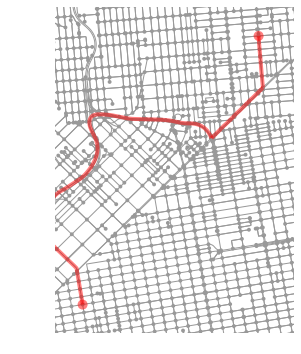

(<matplotlib.figure.Figure at 0x1bcc5ad15f8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1bcc5acbda0>)

In [7]:
#在上面将经纬度信息转换为道路结点信息后，使用Osmnx提供的可视化相关的函数，观察匹配结 果和实际车辆行驶结果是否比较符合
G_pro = ox.load_graphml('pro_graph.graphml')
route = nx.shortest_path(G_pro,65293642,65352429)
print(G_pro.node[65293642])
print(G_pro.node[65352429])
ox.plot_graph_route(G_pro, route,bbox=(4178990,4183171,549768,552754))

In [8]:
#为保证一般性，再次取两个点作为验证。。。。
route = nx.shortest_path(G_pro,65339258,65365832)
print(G_pro.node[65339258])
print(G_pro.node[65365832])

{'highway': 'traffic_signals', 'osmid': 65339258, 'ref': 'nan', 'x': 549529.9053334035, 'y': 4180897.829590259, 'lon': '-122.4375842', 'lat': '37.7740774'}
{'highway': 'traffic_signals', 'osmid': 65365832, 'ref': 'nan', 'x': 551722.0226649473, 'y': 4182005.872276638, 'lon': '-122.4126147', 'lat': '37.7839425'}


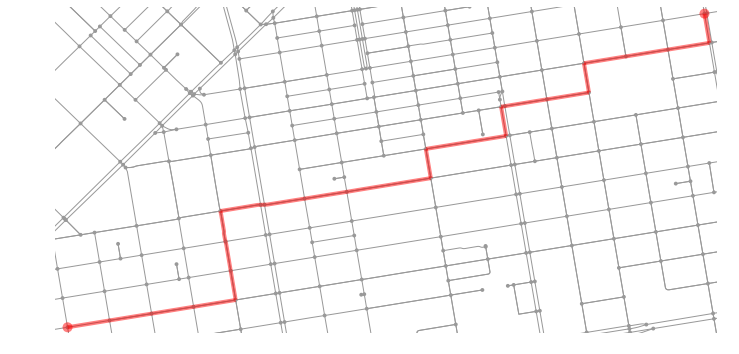

(<matplotlib.figure.Figure at 0x1bcc5a88da0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1bcc5a8feb8>)

In [9]:
ox.plot_graph_route(G_pro, route,bbox=(4180897,4182005,549529,551722))